# Real-time flooding alerts

#### Imports

In [147]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

#### Accès aux données

the "Hydrometry" API from the HYDRO Centrale (PHyC) platform, operated by the Service Central d'Hydrométéorologie et d'Appui à la Prévision des Inondations (SCHAPI).
- https://hubeau.eaufrance.fr/page/api-hydrometrie (see explanations at the end of the notebook)

(API used by Vigicrue)

I used the Seine as an example, with the hydrometric station located under the Austerlitz bridge.

In [148]:
url = "http://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr"

params = {
    "code_entite": "F700000103", # station code    
    "grandeur_hydro": ['H','Q'], # hydrometric variables choosen
    "date_debut_obs": '2023-10-05', # observation start date
    "date_fin_obs": '2023-10-06', # observation end date
    #"latitude": 48.854209,
    #"longitude": 2.348725,
    #"distance": 5,
    #"size": 20,
    #"timestep": 20
}

response = requests.get(url, params=params)

print("status code:",response.status_code)

if response.status_code == '200' or '206': # status codes are detailed on the website
    data = response.json()
    df = pd.DataFrame(data["data"])    
else:
    print(f"La requête a échoué avec le code d'état {response.status_code}")

status code: 200


In [149]:
# Height results
df_H = df.loc[df['grandeur_hydro'] == 'H'].copy()
df_H['date_obs'] = pd.to_datetime(df_H['date_obs'], format='ISO8601')

# Flow rate results
df_Q = df.loc[df['grandeur_hydro'] == 'Q'].copy() 
df_Q['date_obs'] = pd.to_datetime(df_Q['date_obs'], format='ISO8601')

#### Graphs

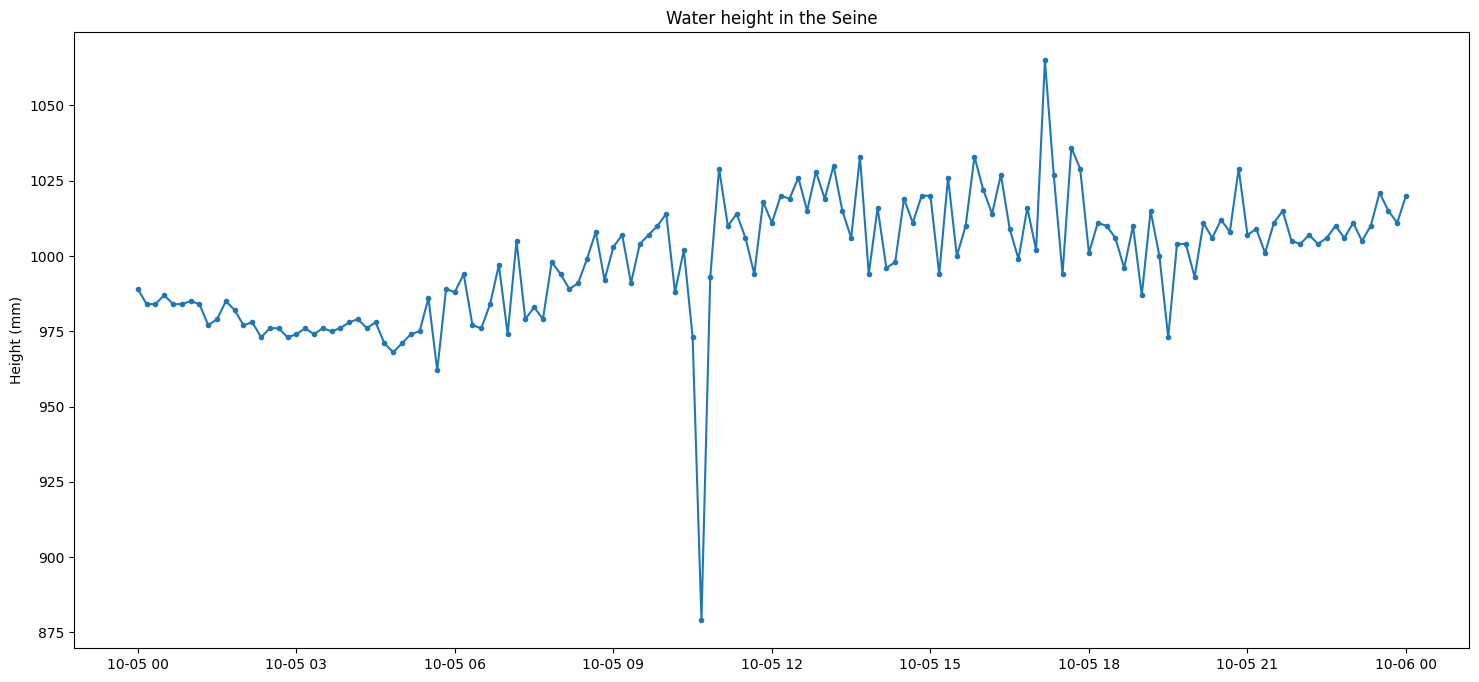

In [150]:
plt.figure(figsize=(18,8))
plt.plot(df_H['date_obs'],df_H['resultat_obs'],marker='.')
plt.title("Water height in the Seine" )
plt.ylabel("Height (mm)")

plt.show()

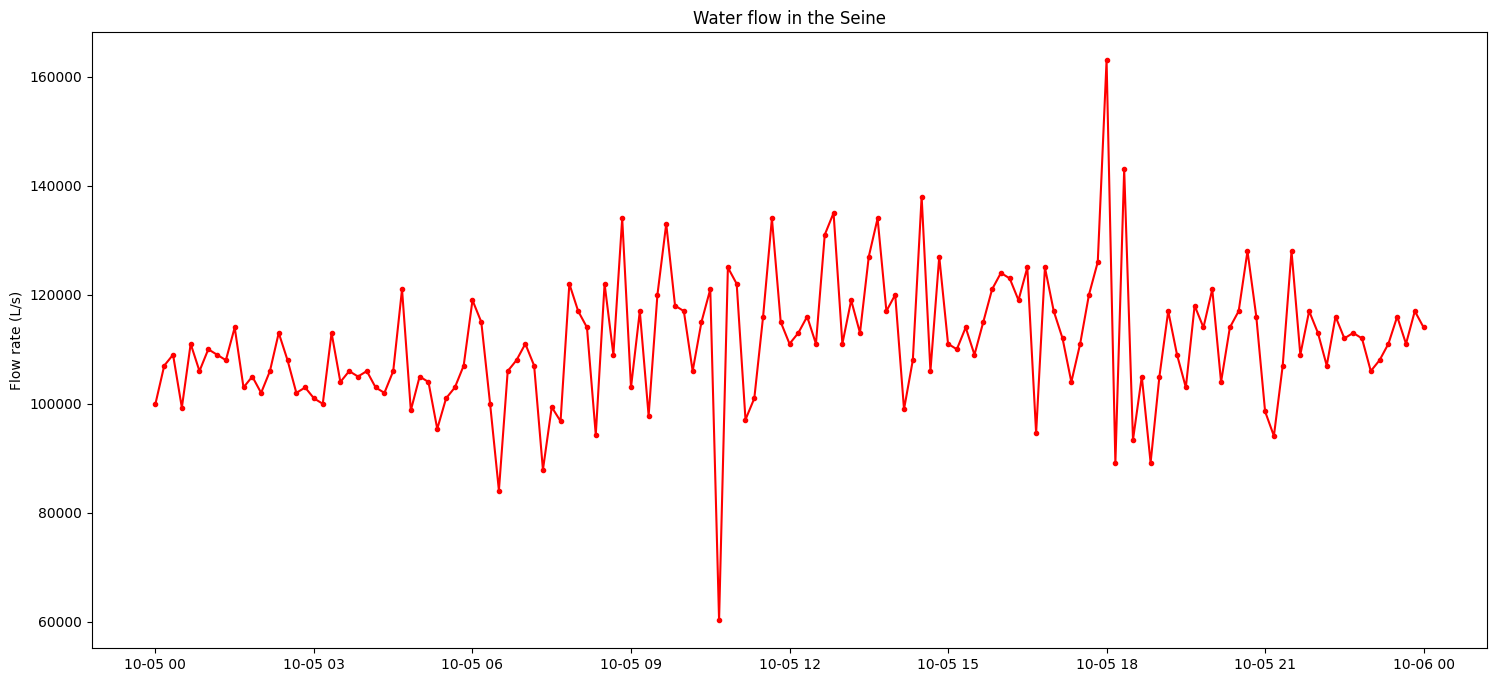

In [151]:
plt.figure(figsize=(18,8))
plt.plot(df_Q['date_obs'],df_Q['resultat_obs'],marker='.',color='r')
plt.title("Water flow in the Seine")
plt.ylabel("Flow rate (L/s)")

plt.show()

In [152]:
df.head()

,code_site,code_station,grandeur_hydro,date_debut_serie,date_fin_serie,statut_serie,code_systeme_alti_serie,date_obs,resultat_obs,code_methode_obs,libelle_methode_obs,code_qualification_obs,libelle_qualification_obs,continuite_obs_hydro,longitude,latitude
0,F7000001,F700000103,H,2023-10-05T23:50:00Z,2023-10-06T00:00:00Z,4,31,2023-10-06T00:00:00Z,1020.0,0,Mesure,16,Non qualifiée,True,2.365511,48.84469
1,F7000001,F700000103,Q,2023-10-05T23:50:00Z,2023-10-06T00:00:00Z,4,31,2023-10-06T00:00:00Z,114000.0,0,Mesure,16,Non qualifiée,True,2.365511,48.84469
2,F7000001,F700000103,H,2023-10-05T23:50:00Z,2023-10-06T00:00:00Z,4,31,2023-10-05T23:50:00Z,1011.0,0,Mesure,16,Non qualifiée,True,2.365511,48.84469
3,F7000001,F700000103,Q,2023-10-05T23:50:00Z,2023-10-06T00:00:00Z,4,31,2023-10-05T23:50:00Z,117000.0,0,Mesure,16,Non qualifiée,True,2.365511,48.84469
4,F7000001,F700000103,H,2023-10-05T00:10:00Z,2023-10-05T23:40:00Z,4,31,2023-10-05T23:40:00Z,1015.0,0,Mesure,16,Non qualifiée,True,2.365511,48.84469


#### Explication de chaque paramètre

bbox (Rectangle d'emprise de l'objet demandé):
- Il s'agit d'un filtre pour spécifier une zone géographique. Vous définissez un rectangle en utilisant les coordonnées WGS84 (EPSG:4326) sous la forme "min longitude, min latitude, max longitude, max latitude".
Exemple : bbox=1.6194,47.7965,2.1910,47.9988 pour une zone autour de Paris.

code_entite (Code de la station hydrométrique) :
- Vous pouvez spécifier des codes de stations hydrométriques pour filtrer les résultats. Vous pouvez également utiliser un pattern comme "K*" pour obtenir des stations dont le code commence par "K".
Exemple : code_entite=J4310010 pour une station spécifique ou code_entite=K* pour toutes les stations dont le code commence par "K".

cursor (Curseur de pagination) :
- Ce paramètre permet de paginer les résultats en utilisant un curseur. Il est généralement renseigné avec une valeur obtenue lors de la première requête pour récupérer les pages suivantes.
Exemple : cursor=eyJjb25zdW1lciI6IjIwMjMtMTItMjZUMT..." (valeur du curseur obtenue précédemment).

date_debut_obs (Date de début d'observation hydro) :
- Vous pouvez spécifier une date de début au format ISO 8601 pour filtrer les observations hydrométriques. La date ne peut pas être antérieure d'un mois par rapport à la date actuelle.
Exemple : date_debut_obs=2023-09-01 pour obtenir des observations à partir du 1er septembre 2023.

date_fin_obs (Date de fin d'observation hydro) :
- Il s'agit de la date de fin pour filtrer les observations hydrométriques.
Exemple : date_fin_obs=2023-09-30 pour obtenir des observations jusqu'au 30 septembre 2023.

distance (Rayon de recherche en kilomètre) :
- Si vous souhaitez rechercher des observations dans un rayon autour d'un point spécifique, vous pouvez utiliser ce paramètre en spécifiant la distance en kilomètres.
Exemple : distance=30 pour rechercher dans un rayon de 30 kilomètres autour du point spécifié.

fields (Liste des champs souhaités dans la réponse) :
- Vous pouvez spécifier les champs que vous souhaitez inclure dans la réponse. Par exemple, si vous voulez seulement les codes de station et les localisations, vous pouvez utiliser fields=code_station,localisation.

grandeur_hydro (Grandeur hydrométrique observée pour la série) :
- Vous pouvez spécifier les grandeurs hydrométriques que vous souhaitez obtenir. Les deux valeurs possibles sont "H" (hauteur d'eau) et "Q" (débit).
Exemple : grandeur_hydro=H pour obtenir seulement les observations de hauteur d'eau.

latitude et longitude (Latitude et longitude du point) :
- Si vous recherchez des observations dans un rayon autour d'un point spécifique, vous devez spécifier la latitude et la longitude de ce point en utilisant le format WGS84.
Exemple : latitude=48.8566 et longitude=2.3522 pour Paris.

size (Nombre maximum de résultats dans une page) :
- Vous pouvez spécifier le nombre maximal de résultats que vous souhaitez obtenir dans une seule page de résultats. Par défaut, la valeur est de 20.
Exemple : size=50 pour obtenir jusqu'à 50 résultats par page.

sort (Ordre de tri) :
- Vous pouvez spécifier l'ordre de tri des résultats en fonction de la date d'observation. Les valeurs possibles sont "asc" (ascendant) et "desc" (descendant).
Exemple : sort=asc pour trier les observations par date croissante.

timestep (Pas de temps fixe exprimé en minutes) :
- Ce paramètre permet de spécifier un pas de temps fixe en minutes pour les observations. Cependant, il ne fonctionne que lorsque vous effectuez une recherche sur un seul code_entite, et le service n'a pas de pagination.
Exemple : timestep=30 pour obtenir des observations toutes les 30 minutes.

##### Autres liens

- https://www.hydro.eaufrance.fr/stationhydro/F700000103/fiche